# <font color='blue'> **HW3**</font>

The data is taken from https://seffaflik.epias.com.tr/transparency/tuketim/gerceklesen-tuketim/gercek-zamanlituketim.xhtml. For homework, I worked on the electricity hourly consumption data between 1st January 2016 and 1st December 2020.

Firstly, I took data with csv file, renamed columns and arranged "Date" column to date format and "Hour" column to integer values between 0-23. (0=00.00 , 1=01.00 ... , 23=23.00)

In [1]:
data1 <- read.csv("GercekZamanliTuketim-01012016-01122020.csv",TRUE,",")
colnames(data1)[1]='Date'
colnames(data1)[2]='Hour'
colnames(data1)[3]='Consumption'
data1$Date = as.Date(data1$Date,"%d.%m.%Y")
data1$Hour = as.integer(substr(data1$Hour,1,2))

Then I checked that all dates have 24 hours and all hours have all days between 01.01.2016 and 01.12.2020. 

In [2]:
which(unlist(table(data1$Date) !=24))

named integer(0)

All unique "Date" values have 24 records.

In [3]:
max(data1$Date)-min(data1$Date)+1

Time difference of 1797 days

In [4]:
table(data1$Hour)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1797 1797 1797 1796 1798 1797 1797 1797 1797 1797 1797 1797 1797 1797 1797 1797 
  16   17   18   19   20   21   22   23 
1797 1797 1797 1797 1797 1797 1797 1797 

There are 1797 days between the date limits. However, the number of records on 3rd and 4th hour are not equal to 1797. So I analyzed firstly the unusual records.

In [5]:
which(table(data1$Date, data1$Hour==4)[,2] == 2)

2016-03-27 
        87

Firstly I looked Hour 4 that which date it can be doubled because of 1798 records. 27th March 2016 is the date that Hour 4 doubled. Then I filtered this day's records.

In [6]:
subset(data1, Date == "2016-03-27")

,Date,Hour,Consumption
2065,2016-03-27,0,"27.424,42"
2066,2016-03-27,1,"25.949,63"
2067,2016-03-27,2,"0,00"
2068,2016-03-27,4,"24.776,94"
2069,2016-03-27,4,"24.776,94"
2070,2016-03-27,5,"24.098,97"
2071,2016-03-27,6,"23.267,43"
2072,2016-03-27,7,"22.531,83"
2073,2016-03-27,8,"23.398,59"
2074,2016-03-27,9,"24.969,23"


As seen in data, Hour 3 record was not recorded and Hour 4 record was doubled in days. To fix it, I change one of doubled records with Hour = 3, and Consumption = 0. I assigned consumption as 0 because I don't know the actual records and I thought that I can eliminate the 0 values because of not being actual records

In [7]:
data1[2068,2]=3
data1[2068,3]=0
subset(data1, Date == "2016-03-27")

Warning message in `[<-.factor`(`*tmp*`, iseq, value = 0):
"invalid factor level, NA generated"

,Date,Hour,Consumption
2065,2016-03-27,0,"27.424,42"
2066,2016-03-27,1,"25.949,63"
2067,2016-03-27,2,"0,00"
2068,2016-03-27,3,NA
2069,2016-03-27,4,"24.776,94"
2070,2016-03-27,5,"24.098,97"
2071,2016-03-27,6,"23.267,43"
2072,2016-03-27,7,"22.531,83"
2073,2016-03-27,8,"23.398,59"
2074,2016-03-27,9,"24.969,23"


As seen table above, consumption of hour 3 took NA values, probably due to the type of Consumption columns. Therefore, I change type of column as numeric and reapply to assign process.

In [8]:
data1$Consumption=gsub(".","",data1$Consumption,fixed = TRUE)
data1$Consumption=gsub(",",".",data1$Consumption,fixed = TRUE)
data1$Consumption = as.numeric(data1$Consumption)
data1[2068,2]=3
data1[2068,3]=0
subset(data1, Date == "2016-03-27")

,Date,Hour,Consumption
2065,2016-03-27,0,27424.42
2066,2016-03-27,1,25949.63
2067,2016-03-27,2,0.00
2068,2016-03-27,3,0.00
2069,2016-03-27,4,24776.94
2070,2016-03-27,5,24098.97
2071,2016-03-27,6,23267.43
2072,2016-03-27,7,22531.83
2073,2016-03-27,8,23398.59
2074,2016-03-27,9,24969.23


In [9]:
table(data1$Hour)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1797 1797 1797 1797 1797 1797 1797 1797 1797 1797 1797 1797 1797 1797 1797 1797 
  16   17   18   19   20   21   22   23 
1797 1797 1797 1797 1797 1797 1797 1797 

Then I checked Hours again that the number of records in each hour equals to 1797.

In [10]:
library(data.table)
setDT(data1, keep.rownames=FALSE)
data1[Date < '2020-11-01', Test := 0]
data1[Date >= '2020-11-01', Test := 1]
data1

Date,Hour,Consumption,Test
2016-01-01,0,26277.24,0
2016-01-01,1,24991.82,0
2016-01-01,2,23532.61,0
2016-01-01,3,22464.78,0
2016-01-01,4,22002.91,0
2016-01-01,5,21957.08,0
2016-01-01,6,22203.54,0
2016-01-01,7,21844.16,0
2016-01-01,8,23094.73,0
2016-01-01,9,25202.27,0


Lastly, I created Test colums to specify rows are belong to test or train data set. (0=Train, 1=Test). Then raw data is ready to analyze.

### <font color='red'>Part A</font>

I prepared the data for applying Naive Approach with Lah 2 days(48 hours) and 7 days (168 hours)

In [11]:
data1$Lag_48 = 0 
data1$Lag_168 = 0
data1[49:nrow(data1),5] = data1[1:(nrow(data1)-48),3]
data1[169:nrow(data1),6] = data1[1:(nrow(data1)-168),3]
data1[c(48,49,50,168,169,170),]

Date,Hour,Consumption,Test,Lag_48,Lag_168
2016-01-02,23,29621.09,0,0.00,0.00
2016-01-03,0,27613.96,0,26277.24,0.00
2016-01-03,1,25779.28,0,24991.82,0.00
2016-01-07,23,31092.87,0,31629.97,0.00
2016-01-08,0,28602.02,0,29189.27,26277.24
2016-01-08,1,27112.37,0,27614.02,24991.82


As seen the table above, lag 48 data starts at 03.01.2016 (2 days lag) and lag 168 starts at 08.01.2016(7 days lag), so it can be said the lag assigments are true.

Then I took test data seperately, because of the simplicity to analyze 

In [12]:
testdata = data1[Test == 1]

I did not filter the 0 valued consumption records, because they are far from test data. 

In [13]:
a=abs((testdata[,5]-testdata[,3]))/testdata[,3]
MAPE_Lag_48 = mean(a$Lag_48)*100
MAPE_Lag_48

[1] 8.060315

The MAPE value of Lag 48 approach is 8.06031450907751.

In [14]:
b=abs((testdata[,6]-testdata[,3]))/testdata[,3]
MAPE_Lag_168 = mean(b$Lag_168)*100
MAPE_Lag_168

[1] 3.449188

The MAPE value of Lag 168 approach is 3.44918848261228.
We can say that MAPE value is better for Lag 168 than Lag 48. Therefore, the Lag 168 can be more closes values to the real value instead of Lag 48. Weekly forecasting with naive approach is better than 2 days's forecasting with naive.

### <font color='red'>Part B</font>

In part B, we modeled data by using linear regression approach where inputs are Lag 48 and Lag 168, and predict the test value. 

First of all, first 168 records must be subtracted from data, because Lag 168 values cannot be calculated for there records, and using these records can prevent to construct a better model with Lag 168 input.

Then 0 consumption values must be subtracted, because the actual consumption values are not known, and false values make model worse.

In [15]:
data2 = data1[169:nrow(data1),]
data2 = data2[Consumption!=0]
data2 = data2[Lag_48!=0]
data2 = data2[Lag_168!=0]
data2[Consumption==0 | Lag_48==0 | Lag_168==0]

Date,Hour,Consumption,Test,Lag_48,Lag_168


Then I constructed model, predict the test values and calculate MAPE.

In [16]:
model_train = lm(Consumption ~ Lag_48+ Lag_168, data = data2[data2$Test == 0])
summary(model_train)
predict_test = predict(model_train, newdata = data2[data2$Test == 1])
new_mape=abs((predict_test-testdata[,3]))/testdata[,3]
MAPE_LM_Total = mean(new_mape$Consumption)*100
MAPE_LM_Total


Call:
lm(formula = Consumption ~ Lag_48 + Lag_168, data = data2[data2$Test == 
    0])

Residuals:
     Min       1Q   Median       3Q      Max 
-17126.3   -983.9     -0.4   1016.6  16105.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.564e+03  8.342e+01   18.75   <2e-16 ***
Lag_48      3.083e-01  3.093e-03   99.68   <2e-16 ***
Lag_168     6.439e-01  3.091e-03  208.35   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2387 on 42207 degrees of freedom
Multiple R-squared:  0.7759,	Adjusted R-squared:  0.7758 
F-statistic: 7.305e+04 on 2 and 42207 DF,  p-value: < 2.2e-16


[1] 4.228021

MAPE value is 4.22802072450835. 

It is slightly higher than Lag 168 MAPE value. According to the test result, Naive with 1 week lag is still a better model. 

### <font color='red'>Part C</font>

For this part, I can construct model for each hour, and predict to the test data hourly.

In [17]:
a = matrix( nrow=31*24, ncol=2)
for (i in 0:23){
  model_train_hourly = lm(Consumption ~ Lag_48 + Lag_168, data = data2[data2$Hour == i & data2$Test == 0,])
  predict_test_hourly = predict(model_train_hourly, newdata = data2[data2$Hour == i & data2$Test == 1,])
  a[(i*31+1):((i+1)*31),1] = i
  a[(i*31+1):((i+1)*31),2] = predict_test_hourly
  }
a=as.data.table(a)
print(head(a))
print(tail(a))

   V1       V2
1:  0 29398.70
2:  0 29199.88
3:  0 29774.00
4:  0 29233.08
5:  0 30423.09
6:  0 30291.92
   V1       V2
1: 23 35731.13
2: 23 35422.20
3: 23 34813.75
4: 23 34023.27
5: 23 34905.25
6: 23 34190.70


Then for each hour, I calculated MAPE values.

In [18]:
b=matrix(nrow=24,ncol=2)
for(i in 0:23){
    hourly_mape=abs(a[V1==i,2]-testdata[Hour==i,3])/testdata[Hour==i,3]
    hourly_mape = mean(hourly_mape$V2)*100 
    b[(i+1),1] = i
    b[(i+1),2] = hourly_mape
}
MAPE_LM_Hourly =as.data.table(b)
colnames(MAPE_LM_Hourly)[1]='Hour'
colnames(MAPE_LM_Hourly)[2]='MAPE'
MAPE_LM_Hourly

Hour,MAPE
0,3.262965
1,3.283087
2,3.418989
3,3.202953
4,3.183023
5,3.187450
6,3.148057
7,3.776119
8,4.672350
9,5.484825


All MAPE values hourly are shown in table above. 

MAPE value for lag 168 is 3.44918848261228 and for 48 is 8.06031450907751.

The table shows that MAPE values are higher in working hours (8-18) then non-working hours. We can say that working hours creates biases. The situation that people mostly work in weekdays rather than weekend creates the consumption difference in working hours.

Hourly MAPE values are higher in working hours than Lag 168 in Part A, and generally lower in non-woking hours. We can say that naive approach with 168 lag is still better and usable than hourly linear regression approaches for working hours, but is worse than for non-working hours. 

All hourly MAPE values are lower than 48 Lag MAPE in Part A. Therefore Naive with 48 lag can not be usable.

### <font color='red'>Part D</font>

Because more columns are calculated for wide process, we can fill the 0 or NA values with most relevant values. We have 2 0 values: Hour 2 and 3 on "27.03.2016". For this hours, lm approach is better than naive approaches, then I applied linear regression to predict the 0 values.

In [19]:
model_train_hourly = lm(Consumption ~ Lag_48 + Lag_168, data = data2[data2$Hour == 2 & data2$Test == 0,])
pred_0_val_hour_2 = predict(model_train_hourly, newdata = data1[data1$Hour == 2 & data1$Date == "2016-03-27",])
model_train_hourly = lm(Consumption ~ Lag_48 + Lag_168, data = data2[data2$Hour == 3 & data2$Test == 0,])
pred_0_val_hour_3 =predict(model_train_hourly, newdata = data1[data1$Hour == 3 & data1$Date == "2016-03-27",])

In [20]:
data3=data1[169:nrow(data1),]
data3[Consumption==0 & Hour==2,"Consumption"] = pred_0_val_hour_2
data3[Lag_48==0 & Hour==2,"Lag_48"] = pred_0_val_hour_2
data3[Lag_168==0 & Hour==2,"Lag_168"] = pred_0_val_hour_2
data3[Consumption==0 & Hour==3,"Consumption"] = pred_0_val_hour_3
data3[Lag_48==0 & Hour==3,"Lag_48"] = pred_0_val_hour_3
data3[Lag_168==0 & Hour==3,"Lag_168"] = pred_0_val_hour_3
data3

Date,Hour,Consumption,Test,Lag_48,Lag_168
2016-01-08,0,28602.02,0,29189.27,26277.24
2016-01-08,1,27112.37,0,27614.02,24991.82
2016-01-08,2,25975.34,0,26578.97,23532.61
2016-01-08,3,25315.55,0,25719.19,22464.78
2016-01-08,4,25128.15,0,25864.63,22002.91
2016-01-08,5,25356.22,0,25918.59,21957.08
2016-01-08,6,26338.72,0,27091.94,22203.54
2016-01-08,7,28086.42,0,28533.05,21844.16
2016-01-08,8,32702.24,0,33203.34,23094.73
2016-01-08,9,35788.17,0,36257.22,25202.27


I added wide columns in data.

In [21]:
data3=data1[169:nrow(data1),]
for(i in 0:23){
  a = data3[Hour==i,5]
  c=as.numeric(unlist(a))
  c=rep(c,each=24)
  c=as.data.table(c)
  data3$v1 = c
  colnames(data3)[i+7]=paste("Lag_day2_hour",i,sep = "_")
}

In [22]:
for(i in 0:23){
  a = data3[Hour==i,6]
  c=as.numeric(unlist(a))
  c=rep(c,each=24)
  c=as.data.table(c)
  data3$v1 = c
  colnames(data3)[i+31]=paste("Lag_day7_hour",i,sep = "_")
}
data3

Date,Hour,Consumption,Test,Lag_48,Lag_168,Lag_day2_hour_0,Lag_day2_hour_1,Lag_day2_hour_2,Lag_day2_hour_3,...,Lag_day7_hour_14,Lag_day7_hour_15,Lag_day7_hour_16,Lag_day7_hour_17,Lag_day7_hour_18,Lag_day7_hour_19,Lag_day7_hour_20,Lag_day7_hour_21,Lag_day7_hour_22,Lag_day7_hour_23
2016-01-08,0,28602.02,0,29189.27,26277.24,29189.27,27614.02,26578.97,25719.19,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
2016-01-08,1,27112.37,0,27614.02,24991.82,29189.27,27614.02,26578.97,25719.19,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
2016-01-08,2,25975.34,0,26578.97,23532.61,29189.27,27614.02,26578.97,25719.19,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
2016-01-08,3,25315.55,0,25719.19,22464.78,29189.27,27614.02,26578.97,25719.19,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
2016-01-08,4,25128.15,0,25864.63,22002.91,29189.27,27614.02,26578.97,25719.19,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
2016-01-08,5,25356.22,0,25918.59,21957.08,29189.27,27614.02,26578.97,25719.19,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
2016-01-08,6,26338.72,0,27091.94,22203.54,29189.27,27614.02,26578.97,25719.19,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
2016-01-08,7,28086.42,0,28533.05,21844.16,29189.27,27614.02,26578.97,25719.19,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
2016-01-08,8,32702.24,0,33203.34,23094.73,29189.27,27614.02,26578.97,25719.19,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09
2016-01-08,9,35788.17,0,36257.22,25202.27,29189.27,27614.02,26578.97,25719.19,...,29548.32,29390.89,30734.97,32048.02,31438.11,30728.47,30166.14,29461.28,29242.83,28069.09


I applied cv.glmnet function.

In [23]:
library(glmnet)
a=as.matrix(data3[Test==0,-(1:6)])
b=as.matrix(data3[Test==0,3])

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [24]:
lasso_cv = cv.glmnet(a,b)
lasso_cv

$lambda
 [1] 2516.5005124 2292.9415429 2089.2429360 1903.6403519 1734.5261898
 [6] 1580.4356638 1440.0341154 1312.1054536 1195.5416216 1089.3329990
[11]  992.5596578  904.3833935  824.0404655  750.8349817  684.1328714
[16]  623.3563927  567.9791289  517.5214285  471.5462512  429.6553819
[21]  391.4859820  356.7074464  325.0185400  296.1447887  269.8361019
[26]  245.8646064  224.0226724  204.1211156  185.9875583  169.4649362
[31]  154.4101384  140.6927673  128.1940096  116.8056071  106.4289189
[36]   96.9740671   88.3591583   80.5095742   73.3573255   66.8404629
[41]   60.9025404   55.4921266   50.5623590   46.0705384   41.9777587
[46]   38.2485703   34.8506728   31.7546351   28.9336408   26.3632559
[51]   24.0212169   21.8872382   19.9428363   18.1711697   16.5568930
[56]   15.0860243   13.7458235   12.5246824   11.4120241   10.3982114
[61]    9.4744629    8.6327778    7.8658656    7.1670838    6.5303798
[66]    5.9502389    5.4216360    4.9399928    4.5011375    4.1012688
[71]    3.73

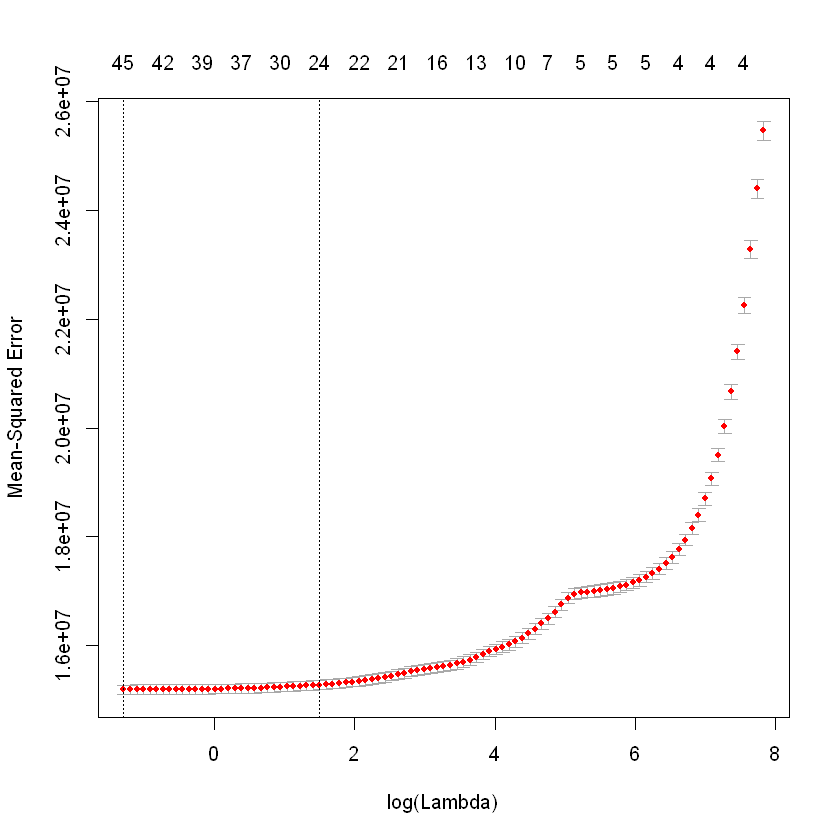

In [25]:
plot(lasso_cv)

In [26]:
lambda_min = lasso_cv$lambda.min
lambda_1se = lasso_cv$lambda.1se
lambda_min
lambda_1se

[1] 0.2761856

[1] 4.501137

Then lasso regression is applied for every hour.

In [27]:
MAPE_Hourly=matrix(nrow=24,ncol=2)
for (i in 0:23){
    x_train = data3[Hour == i & Test==0,]
    x_train = as.matrix(x_train[,-(1:6)])
    y_train = as.matrix(data3[Hour == i & Test==0, 3])
    x_test = data3[Hour == i & Test==1,]
    x_test = as.matrix(x_test[,-(1:6)])
    y_test = as.matrix(data3[Hour == i & Test==1, 3])
    
    lasso_best_hourly = glmnet(x_train,y_train,alpha = 1,lambda = lambda_min)
    
    predict_lasso_hourly = predict(lasso_best_hourly, newx = x_test)
    
    a=abs((predict_lasso_hourly-testdata[Hour==i,3]))/testdata[Hour==i,3]
    b = mean(a$Consumption)*100
    MAPE_Hourly[(i+1),1]=i+1
    MAPE_Hourly[(i+1),2]=b
}
MAPE_Lasso_Hourly = as.data.table(MAPE_Hourly)
colnames(MAPE_Lasso_Hourly) =c("Hour","MAPE_lambda_min")
MAPE_Lasso_Hourly

Hour,MAPE_lambda_min
1,1.448276
2,1.594466
3,1.498448
4,1.379845
5,1.506057
6,1.462045
7,1.749696
8,1.862620
9,2.621104
10,3.687960


In [28]:
MAPE_Hourly=matrix(nrow=24,ncol=2)
for (i in 0:23){
    x_train = data3[Hour == i & Test==0,]
    x_train = as.matrix(x_train[,-(1:6)])
    y_train = as.matrix(data3[Hour == i & Test==0, 3])
    x_test = data3[Hour == i & Test==1,]
    x_test = as.matrix(x_test[,-(1:6)])
    y_test = as.matrix(data3[Hour == i & Test==1, 3])
    
    lasso_best_hourly = glmnet(x_train,y_train,alpha = 1,lambda = lambda_1se)
    
    predict_lasso_hourly = predict(lasso_best_hourly, newx = x_test)
    
    a=abs((predict_lasso_hourly-testdata[Hour==i,3]))/testdata[Hour==i,3]
    b = mean(a$Consumption)*100
    MAPE_Hourly[(i+1),1]=i+1
    MAPE_Hourly[(i+1),2]=b
}
MAPE_Lasso_Hourly_2 = as.data.table(MAPE_Hourly)
colnames(MAPE_Lasso_Hourly_2) =c("Hour","MAPE_lambda_1se")
MAPE_Lasso_Hourly_2

Hour,MAPE_lambda_1se
1,1.417480
2,1.497769
3,1.452116
4,1.289253
5,1.373025
6,1.369878
7,1.633500
8,1.802114
9,2.561502
10,3.650477


Both MAPE values of Lasso Regression are lower than other parts' result (Part A, B, C). Teherefore Lasso Regression is more accurate then others. In addition, MAPE value of Lasso Regression by using lambda = lambda_1se is slightly lower than lambda = lambda_min. Therefore, 2nd model is more accurate than the 1st.

### <font color='red'>Part E</font>

In [29]:
library(CVXR)
library(caret)

Warning message:
"package 'CVXR' was built under R version 3.6.3"
Attaching package: 'CVXR'

The following object is masked from 'package:stats':

    power

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [32]:
lambda_1 = lambda_1se
lambda_2 = lambda_1se
beta <- Variable(48)
MAPE_Hourly=matrix(nrow=24,ncol=2)

for (i in 0:23){
    x_train = data3[Hour == i & Test==0,]
    x_train = as.matrix(x_train[,-(1:6)])
    y_train = as.matrix(data3[Hour == i & Test==0, 3])
    x_test = data3[Hour == i & Test==1,]
    x_test = as.matrix(x_test[,-(1:6)])
    y_test = as.matrix(data3[Hour == i & Test==1, 3])
  
    formula <- sum((y_train - x_train %*% beta)^2) + abs(lambda_2) * sum(beta^2) 
    + abs(lambda_1) * abs(p_norm(diff(x = beta, differences = 1), 1))
    problem <- Problem(Minimize(formula))
    result <- solve(problem)
    
    betas = result$getValue(beta)
    predict_bonus = x_test %*% betas
    
    a=abs((predict_bonus-testdata[Hour==i,3]))/testdata[Hour==i,3]
    b = mean(a$Consumption)*100
    MAPE_Hourly[(i+1),1]=i+1
    MAPE_Hourly[(i+1),2]=b
}
MAPE_Bonus = as.data.table(MAPE_Hourly)
colnames(MAPE_Bonus) =c("Hour","MAPE_Bonus")
MAPE_Bonus

Hour,MAPE_Bonus
1,1.523013
2,1.700103
3,1.620928
4,1.512250
5,1.648151
6,1.599109
7,1.885510
8,2.059630
9,2.888380
10,3.822225


As seen in table above, MAPE values generally higher then Lasso Models. Therefore, Lasso is still best choice.

### <font color='red'>Part F</font>

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> tibble  2.1.1       <U+221A> purrr   0.3.2  
<U+221A> tidyr   0.8.3       <U+221A> dplyr   0.8.0.1
<U+221A> readr   1.3.1       <U+221A> stringr 1.4.0  
<U+221A> tibble  2.1.1       <U+221A> forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x purrr::accumulate() masks foreach::accumulate()
x dplyr::between()    masks data.table::between()
x tidyr::expand()     masks Matrix::expand()
x dplyr::filter()     masks stats::filter()
x dplyr::first()      masks data.table::first()
x dplyr::id()         masks CVXR::id()
x purrr::is_vector()  masks CVXR::is_vector()
x dplyr::lag()        masks stats::lag()
x dplyr::last()       masks data.table::last()
x purrr::lift()       masks caret::lift()
x purrr::transpose()  masks data.table::transpose()
x purrr::when()       m

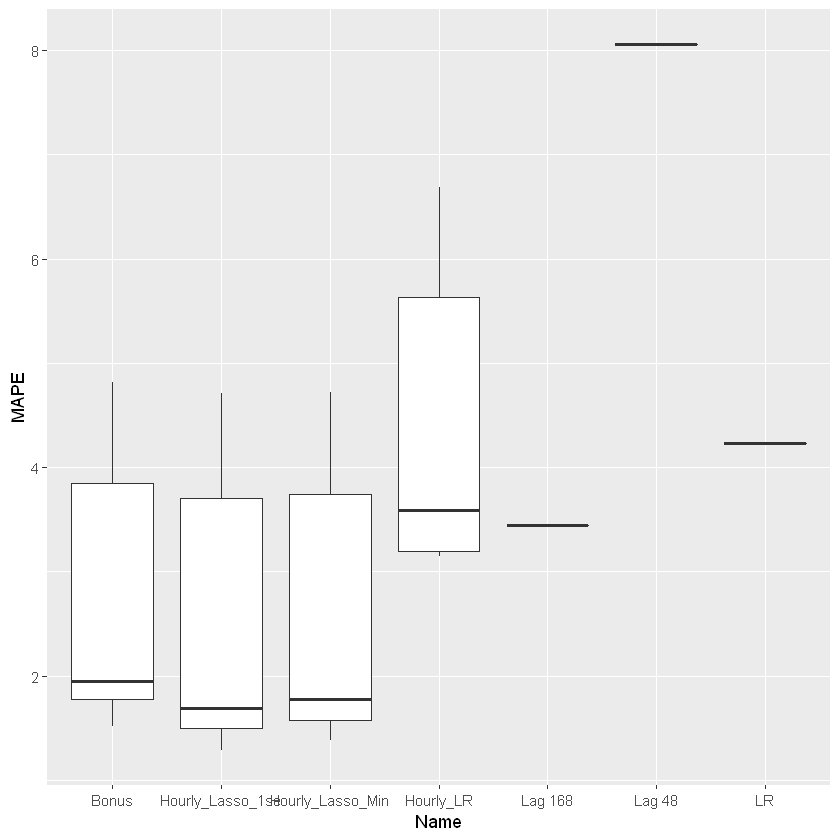

In [33]:
library(tidyverse)
MAPE_Results = data.table(MAPE = c(MAPE_Lag_48, MAPE_Lag_168, MAPE_LM_Total, MAPE_LM_Hourly$MAPE, 
                                   MAPE_Lasso_Hourly$MAPE_lambda_min, MAPE_Lasso_Hourly_2$MAPE_lambda_1se, 
                                   MAPE_Bonus$MAPE_Bonus), 
                      Name = c('Lag 48', 'Lag 168', 'LR', rep('Hourly_LR', 24), rep('Hourly_Lasso_Min', 24), 
                               rep('Hourly_Lasso_1se', 24 ), rep('Bonus', 24)))
ggplot(data = MAPE_Results, aes(x=Name, y=MAPE)) + geom_boxplot()

- Lasso MAPE Results are better than others.
- Lag 168 is better than LR and Lag 48, and LR is better than Lag 48, 2 days Naive approach is the least accurate approach.
- The accuracy changes with respect to hours.
- We can change model with respect to hours for the most accurate result for hours
- Fused Penalties'(Bonus) MAPE results are better than Hourly LR, Lag 168, Lag 48 and LR, but worse than Lasso MAPE values.